In [6]:
"""
FILENAME: bsm_model.ipynb
AUTHOR: Manu M
CREATED: 2025-07-05
UPDATED: -
DESCRIPTION: small script for the usual implementation of a black/scholes/merton pricing model, nothing fancy :)
"""

################ IMPORT
import numpy as np
from scipy.stats import norm # especially for the CDF of course, as it is in the formula
import matplotlib.pyplot as plt # for some plotting
plt.style.use('dark_background') # for cool-looing plots :)

The equations that need implementing are:
\begin{align*}
C &= S_0 \cdot N(d_1) - K \cdot e^{-rT} \cdot N(d_2) \\
P &= K \cdot e^{-rT} \cdot N(-d_2) - S_0 \cdot N(-d_1) \\
\\
d_1 &= \frac{\ln\left(\frac{S_0}{K}\right) + \left( r + \frac{\sigma^2}{2} \right)T}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma \sqrt{T}
\end{align*}

So we need:

S0 = initial stock price

N(.) = CDF of standard normal

d1, d2 = (see above)

K = strike price of option contract

r = risk free rate

sigma = volatility of underlying

T = time2expiry


...



-> for more details on this please see

"Options, Futures, and Other Derivatives" by John C. Hull

or

"Stochastic Calculus for Finance II: Continuous-Time Models" by Steven E. Shreve!

In [7]:
def call(S0, K, r, sigma, T):
    d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    C = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return C

In [8]:
def put(S0, K, r, sigma, T):
    d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T) # copy paste from above!
    P = K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)
    return P

In [15]:
# educational examples, usually one would choose sigma = 0.2 or 0.1, I think 0.2 is a bit high, 0.1 a bit low so I chose 0.18
print(call(100, 110, 0.05, 0.18, 2).item())
print(put(100, 110, 0.05, 0.18, 2).item())

10.340013133515463
9.872129117471012


In [16]:
# now it would be interesting to plot the dependencies for a parameter, ceteris paribus (e.g. what changes in our above example if we vary rf, sigma or T!) for our educational example above

# I will now create one cell per parameter (S0, K, r, sigma, T) and vary them!

# S0 and K

/tmp/ipython-input-7-4284453996.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


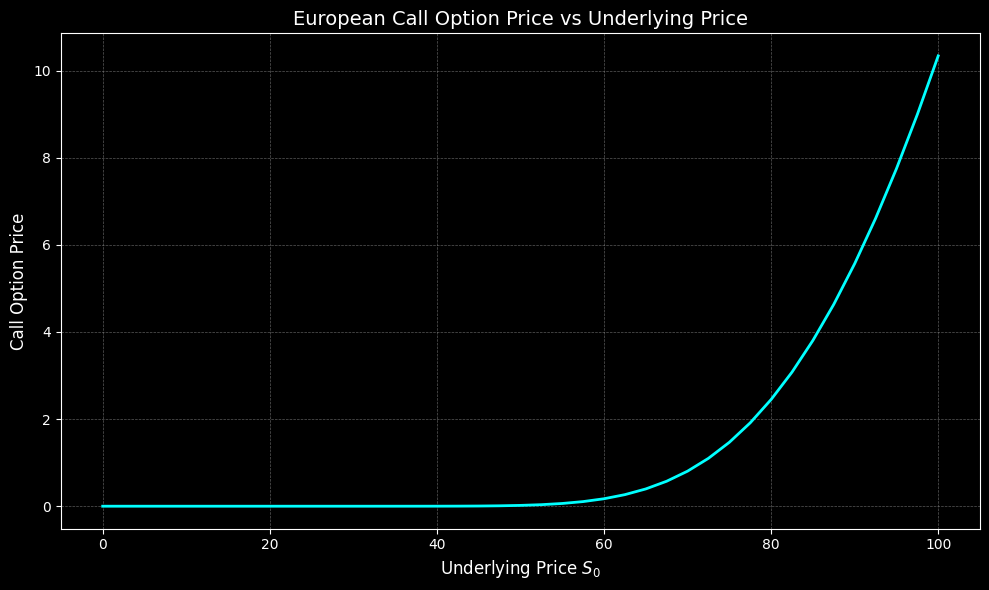

In [19]:
S0s = np.arange(0, 100.1, 2.5) # 100.1 so 100 is included
values = []
for _ in S0s:
  values.append(call(_, 110, 0.05, 0.18, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(S0s, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Underlying Price $S_0$', fontsize=12)
ax.set_ylabel('Call Option Price', fontsize=12)
ax.set_title('European Call Option Price vs Underlying Price', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-2040938403.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


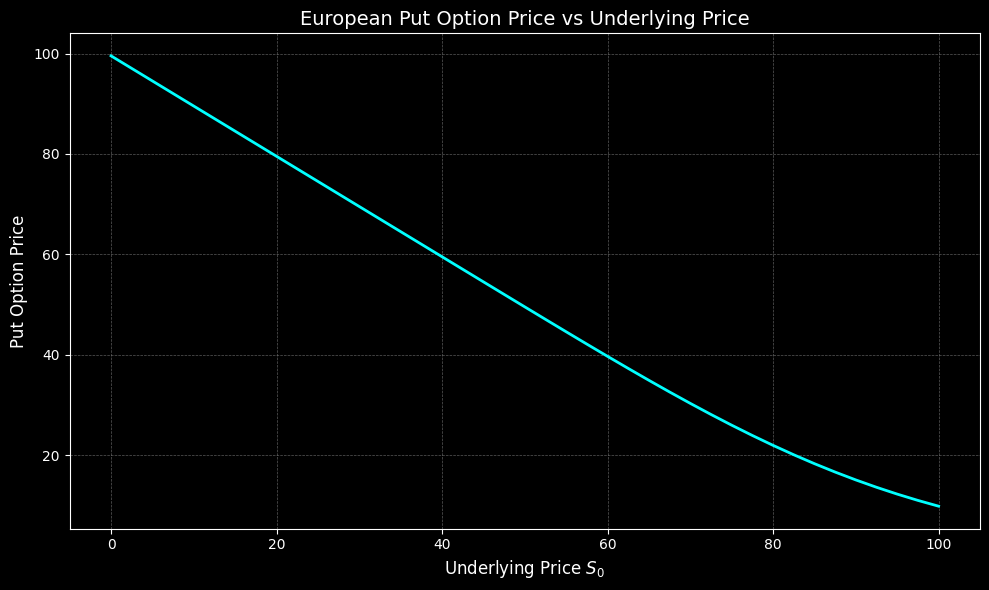

In [23]:
S0s = np.arange(0, 100.1, 2.5) # 100.1 so 100 is included
values = []
for _ in S0s:
  values.append(put(_, 110, 0.05, 0.18, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(S0s, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Underlying Price $S_0$', fontsize=12)
ax.set_ylabel('Put Option Price', fontsize=12)
ax.set_title('European Put Option Price vs Underlying Price', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-4284453996.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


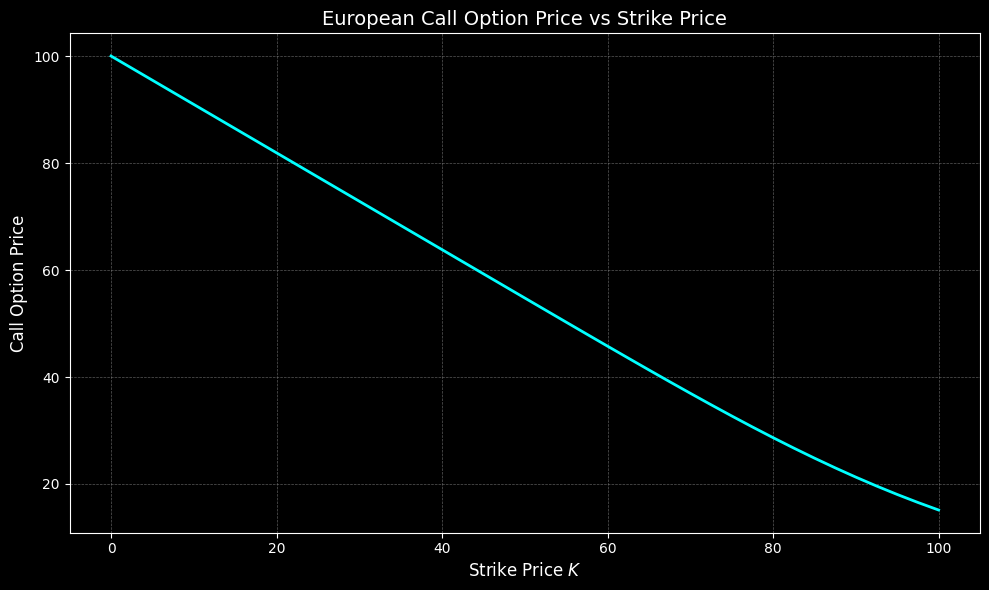

In [22]:
Ks = np.arange(0, 100.1, 2.5) # 100.1 so 100 is included
values = []
for _ in Ks:
  values.append(call(100, _, 0.05, 0.18, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Ks, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Strike Price $K$', fontsize=12)
ax.set_ylabel('Call Option Price', fontsize=12)
ax.set_title('European Call Option Price vs Strike Price', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-2040938403.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


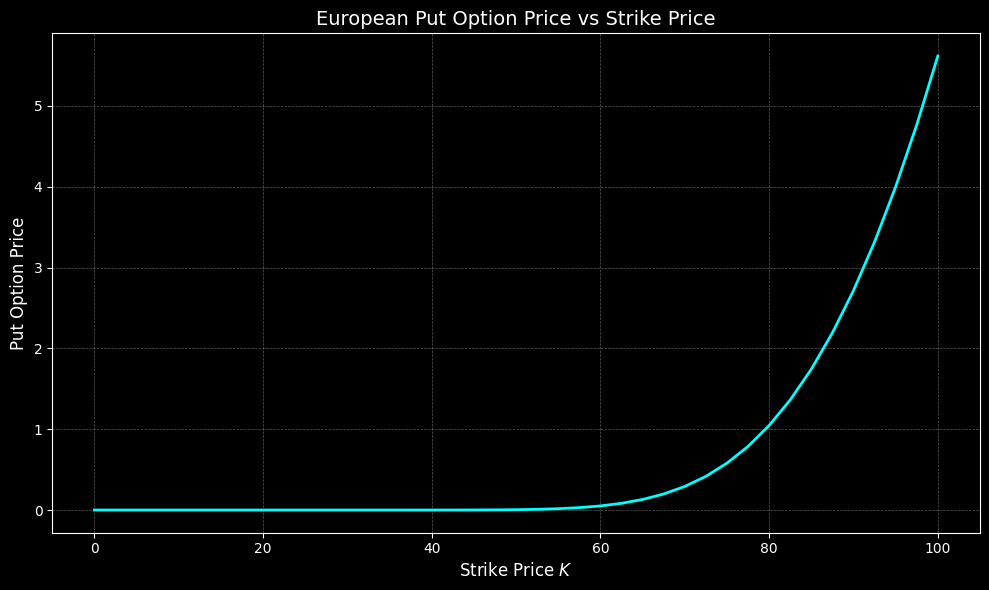

In [24]:
Ks = np.arange(0, 100.1, 2.5) # 100.1 so 100 is included
values = []
for _ in Ks:
  values.append(put(100, _, 0.05, 0.18, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Ks, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Strike Price $K$', fontsize=12)
ax.set_ylabel('Put Option Price', fontsize=12)
ax.set_title('European Put Option Price vs Strike Price', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

# r

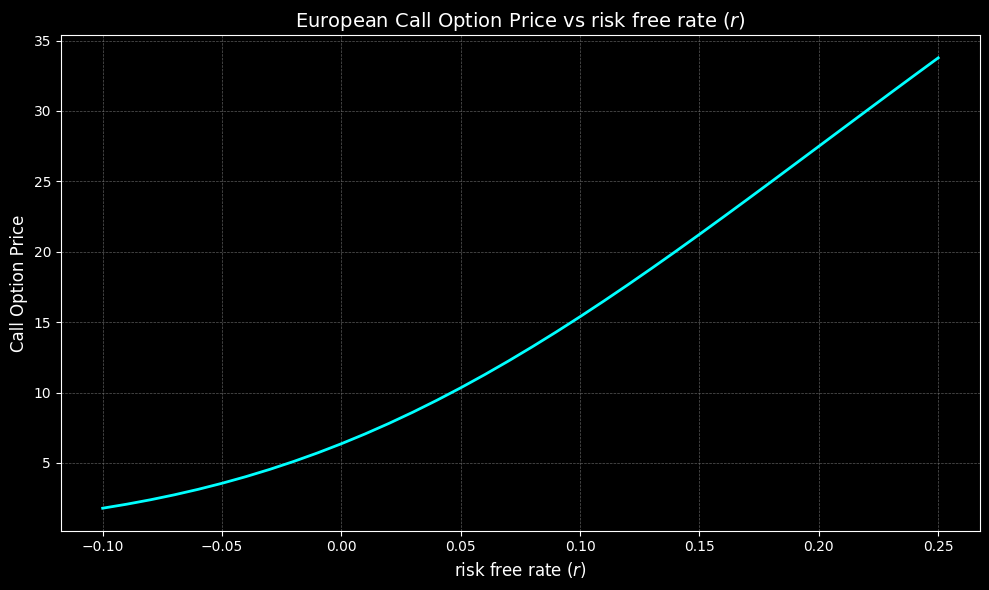

In [27]:
rs = np.arange(-0.1, 0.251, 0.01)
values = []
for _ in rs:
  values.append(call(100, 110, _, 0.18, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rs, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('risk free rate ($r$)', fontsize=12)
ax.set_ylabel('Call Option Price', fontsize=12)
ax.set_title('European Call Option Price vs risk free rate ($r$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

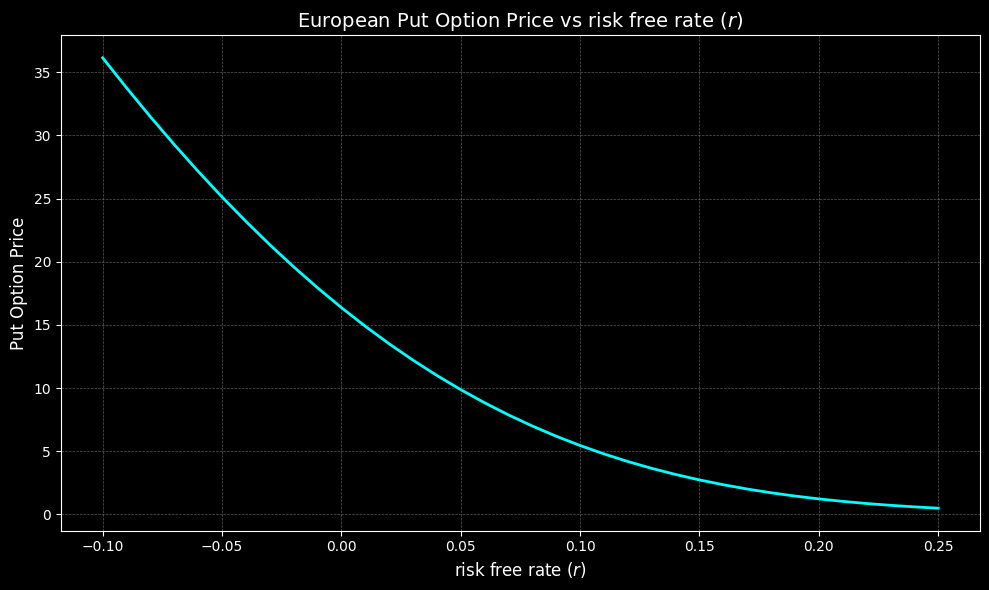

In [28]:
rs = np.arange(-0.1, 0.251, 0.01)
values = []
for _ in rs:
  values.append(put(100, 110, _, 0.18, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(rs, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('risk free rate ($r$)', fontsize=12)
ax.set_ylabel('Put Option Price', fontsize=12)
ax.set_title('European Put Option Price vs risk free rate ($r$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

# sigma

/tmp/ipython-input-7-4284453996.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


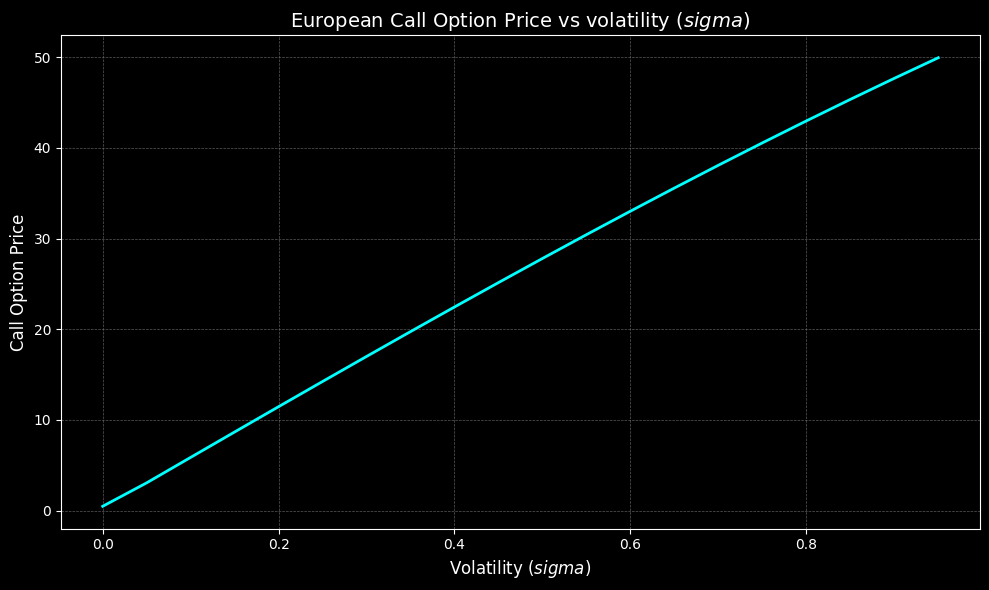

In [30]:
sigmas = np.arange(0, 1, 0.05)
values = []
for _ in sigmas:
  values.append(call(100, 110, 0.05, _, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sigmas, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Volatility ($sigma$)', fontsize=12)
ax.set_ylabel('Call Option Price', fontsize=12)
ax.set_title('European Call Option Price vs volatility ($sigma$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-2040938403.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


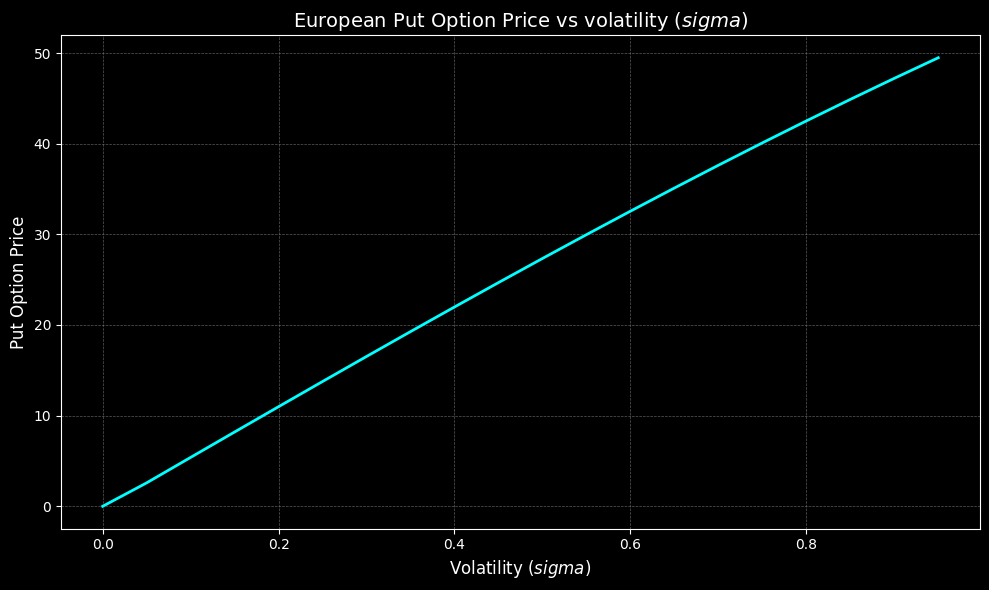

In [31]:
sigmas = np.arange(0, 1, 0.05)
values = []
for _ in sigmas:
  values.append(put(100, 110, 0.05, _, 2).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sigmas, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Volatility ($sigma$)', fontsize=12)
ax.set_ylabel('Put Option Price', fontsize=12)
ax.set_title('European Put Option Price vs volatility ($sigma$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

# T2E

/tmp/ipython-input-7-4284453996.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


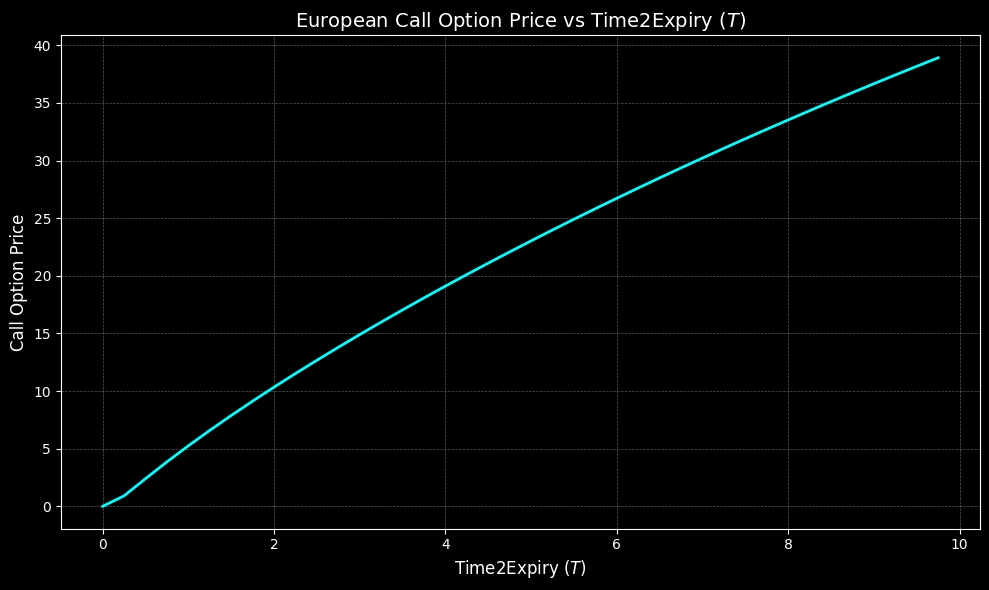

In [33]:
Ts = np.arange(0, 10, 0.25)
values = []
for _ in Ts:
  values.append(call(100, 110, 0.05, 0.18, _).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Ts, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Time2Expiry ($T$)', fontsize=12)
ax.set_ylabel('Call Option Price', fontsize=12)
ax.set_title('European Call Option Price vs Time2Expiry ($T$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-2040938403.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))


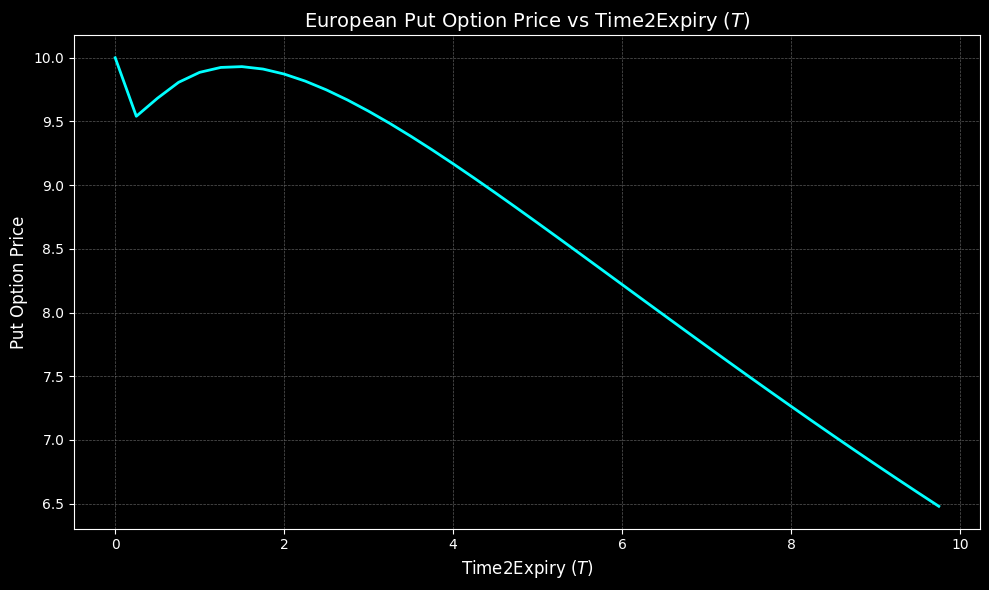

In [34]:
Ts = np.arange(0, 10, 0.25)
values = []
for _ in Ts:
  values.append(put(100, 110, 0.05, 0.18, _).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Ts, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Time2Expiry ($T$)', fontsize=12)
ax.set_ylabel('Put Option Price', fontsize=12)
ax.set_title('European Put Option Price vs Time2Expiry ($T$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# interesting dips at the start? I am actually not sure if this is usually the case with the B/S/M Formula, lets look at the theta (greek for time to expiry)

The equation for Theta of a European CALL option is:
\begin{align*}
\Theta_{\text{call}} &= -\frac{S_0 \cdot \phi(d_1) \cdot \sigma}{2\sqrt{T}} - rK \cdot e^{-rT} \cdot N(d_2) \\
\\
\end{align*}

The equation for Theta of a European PUT option is:
\begin{align*}
\Theta_{\text{put}} &= -\frac{S_0 \cdot \phi(d_1) \cdot \sigma}{2\sqrt{T}} + rK \cdot e^{-rT} \cdot N(-d_2) \\
\\
\end{align*} as per usual with d_1 and d_2 defined as
\begin{align*}
\\
d_1 &= \frac{\ln\left(\frac{S_0}{K}\right) + \left( r + \frac{\sigma^2}{2} \right)T}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma \sqrt{T}
\end{align*}

In [35]:
def Theta_call(S0, K, r, sigma, T):
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  theta = -((S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T))) - (r*K*np.exp(-r*T)*norm.cdf(d2))
  return theta

def Theta_put(S0, K, r, sigma, T):
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  theta = -((S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T))) + (r*K*np.exp(-r*T)*norm.cdf(-d2))
  return theta

# Now let us vary T and look at theta!

/tmp/ipython-input-35-3789647730.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
/tmp/ipython-input-35-3789647730.py:4: RuntimeWarning: invalid value encountered in scalar divide
  theta = -((S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T))) - (r*K*np.exp(-r*T)*norm.cdf(d2))


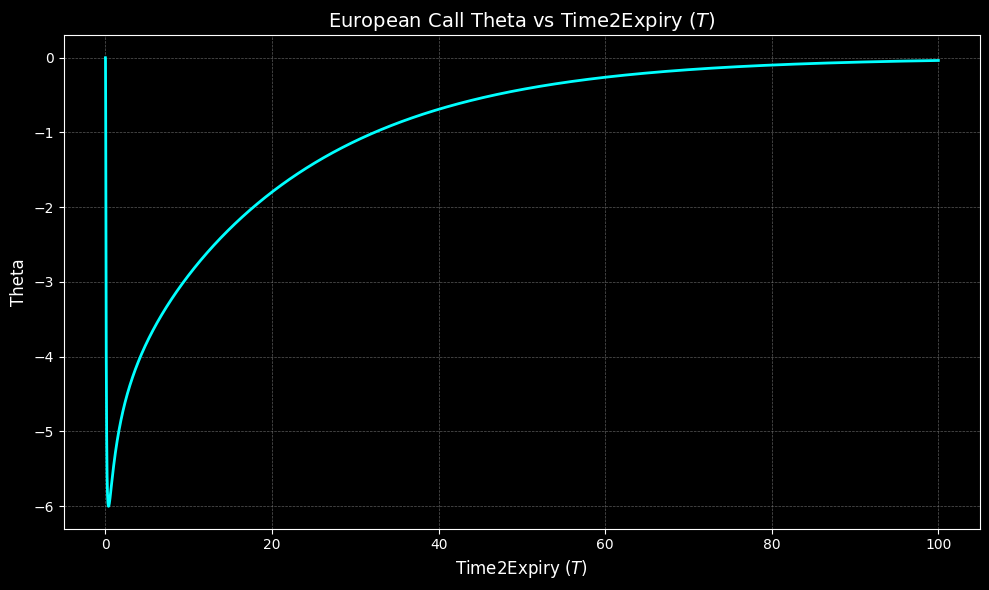

In [39]:
Ts = np.arange(0, 100, 0.01)
values = []
for _ in Ts:
  values.append(Theta_call(100, 110, 0.05, 0.18, _).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Ts, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Time2Expiry ($T$)', fontsize=12)
ax.set_ylabel('Theta', fontsize=12)
ax.set_title('European Call Theta vs Time2Expiry ($T$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-35-3789647730.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S0/K) + (r+((sigma**2)/2))*T)/(sigma*np.sqrt(T))
/tmp/ipython-input-35-3789647730.py:10: RuntimeWarning: invalid value encountered in scalar divide
  theta = -((S0*norm.pdf(d1)*sigma)/(2*np.sqrt(T))) + (r*K*np.exp(-r*T)*norm.cdf(-d2))


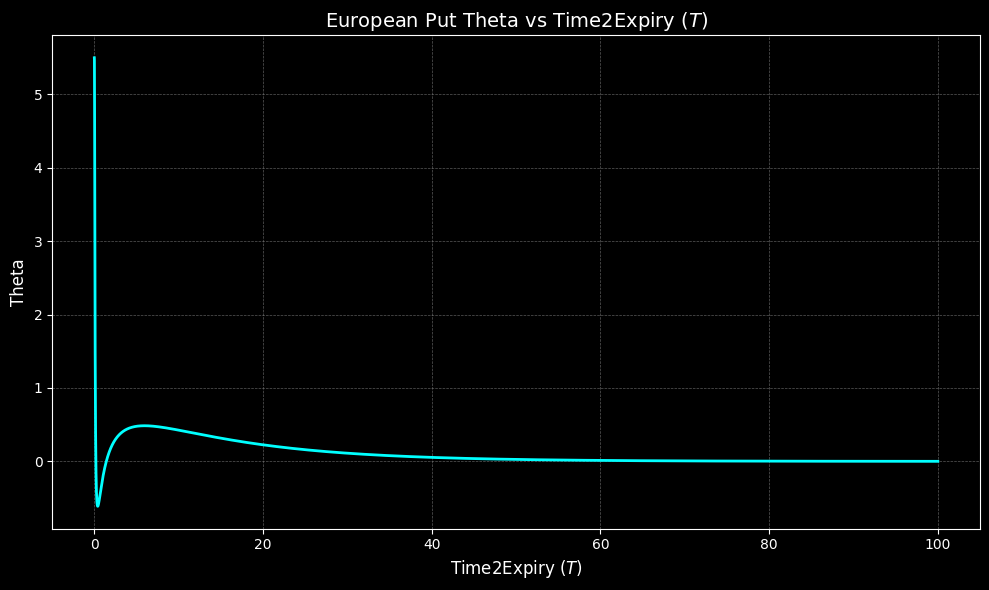

In [40]:
Ts = np.arange(0, 100, 0.01)
values = []
for _ in Ts:
  values.append(Theta_put(100, 110, 0.05, 0.18, _).item())

# Plot Design
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Ts, values, color='cyan', linewidth=2)

# Add labels and title
ax.set_xlabel('Time2Expiry ($T$)', fontsize=12)
ax.set_ylabel('Theta', fontsize=12)
ax.set_title('European Put Theta vs Time2Expiry ($T$)', fontsize=14)

# Add grid with better visibility
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add ticks customization
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# so the interesting "discovery" here is that both THETAs tend towards 0 (when T -> inf), which means as t2e gets bigger the less impact is should have on options prices

# and VERY small Time to expiry (when T -> 0) has (under the H0 that B/S/M is true) a high negative effect on call, a high positive effect on put
# BUT the effect for puts immediately goes negative for puts (e.g. when T2E is between 0 and 1) and then goes slightly positive as T gets bigger then towards 0 as T -> Inf
# the effect for calls is more straight forward, negative sensitivity thats gets less negative as T -> inf

# keep in mind that these are theta values! which means that V(t + delta(t)) =ca.= V(t) + theta*delta(t), when delta(t) is a infit. small time increment
# a negative theta would essentially mean "slightly more Time2Expiry drives down the option price"

# next steps

In [ ]:
# next up it would be interesting to look at another model without an analytical solution (e.g. Heston or Heston + American Options) and simulate it via MC